#  Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Hypothesis Generation

The Hypothesis generation are the various factors which effect the target variables. some of the hypothesis are:
         Brand: Branded products will have higher sales as these brands have customers trust.
         packaging: Any product of any brand with bad packing will not be taken buy any customer. so good packaging leads to more sales.
         utility: Products which are used daily like gorceries, home needs will bought by many people.
         Family Size: Family with more numbers needs products in bulk amount so, larger families leads to higher sales.
         population: stores in the area with more population will  also result in good sales.
         City type: larger cities with more population leads to more sales.

# Loading Packages and Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

# Data Structure and content

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
bigmart=pd.concat([train,test])

In [8]:
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.shape, test.shape, bigmart.shape

((8523, 12), (5681, 11), (14204, 12))

In [10]:
train.columns, test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory data Analysis

In [13]:
str(train)

'     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \\\n0              FDA15        9.300          Low Fat         0.016047   \n1              DRC01        5.920          Regular         0.019278   \n2              FDN15       17.500          Low Fat         0.016760   \n3              FDX07       19.200          Regular         0.000000   \n4              NCD19        8.930          Low Fat         0.000000   \n...              ...          ...              ...              ...   \n8518           FDF22        6.865          Low Fat         0.056783   \n8519           FDS36        8.380          Regular         0.046982   \n8520           NCJ29       10.600          Low Fat         0.035186   \n8521           FDN46        7.210          Regular         0.145221   \n8522           DRG01       14.800          Low Fat         0.044878   \n\n                  Item_Type  Item_MRP Outlet_Identifier  \\\n0                     Dairy  249.8092            OUT049   \n1          

In [14]:
str(test)

'     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \\\n0              FDW58       20.750          Low Fat         0.007565   \n1              FDW14        8.300              reg         0.038428   \n2              NCN55       14.600          Low Fat         0.099575   \n3              FDQ58        7.315          Low Fat         0.015388   \n4              FDY38          NaN          Regular         0.118599   \n...              ...          ...              ...              ...   \n5676           FDB58       10.500          Regular         0.013496   \n5677           FDD47        7.600          Regular         0.142991   \n5678           NCO17       10.000          Low Fat         0.073529   \n5679           FDJ26       15.300          Regular         0.000000   \n5680           FDU37        9.500          Regular         0.104720   \n\n               Item_Type  Item_MRP Outlet_Identifier  \\\n0            Snack Foods  107.8622            OUT049   \n1                

In [15]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [17]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Removing NULL values

In [18]:
bigmart['Item_Weight']=bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean())

In [19]:
bigmart['Outlet_Size']=bigmart['Outlet_Size'].fillna('medium')

In [20]:
bigmart['Item_Outlet_Sales']=bigmart['Item_Outlet_Sales'].fillna(bigmart['Item_Outlet_Sales'].mean())

# Univariate analysis

H:\notebook\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

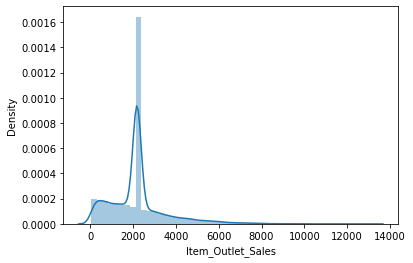

In [21]:
sns.distplot(bigmart['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Weight'>

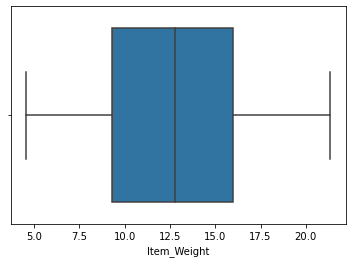

In [22]:
sns.boxplot(x='Item_Weight',data=bigmart)

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

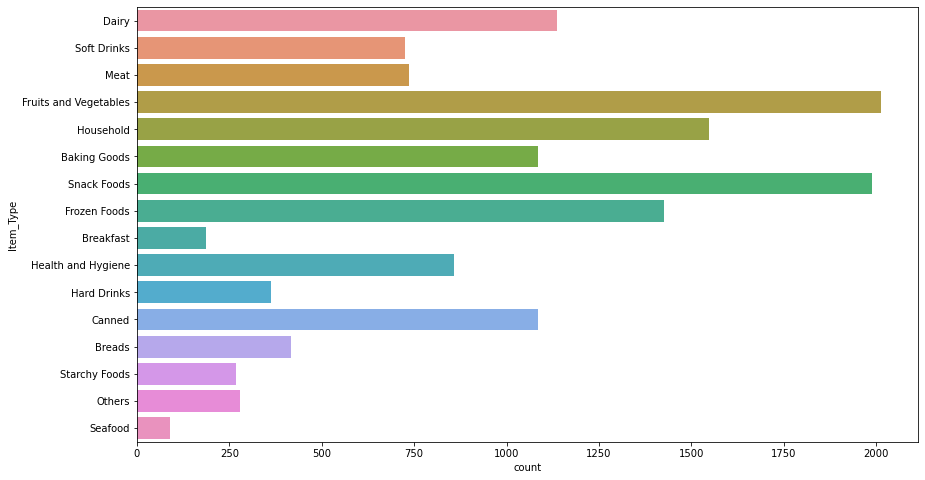

In [23]:
plt.figure(figsize=(14,8))
sns.countplot(y='Item_Type',data=bigmart)

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

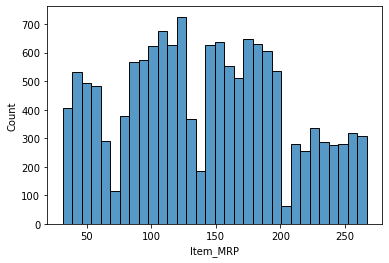

In [24]:
sns.histplot(bigmart['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

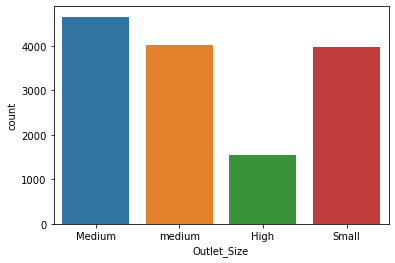

In [25]:
sns.countplot(x='Outlet_Size',data=bigmart)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

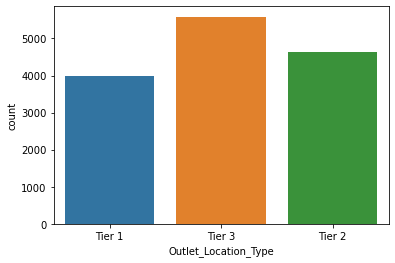

In [26]:
sns.countplot(x='Outlet_Location_Type',data=bigmart)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

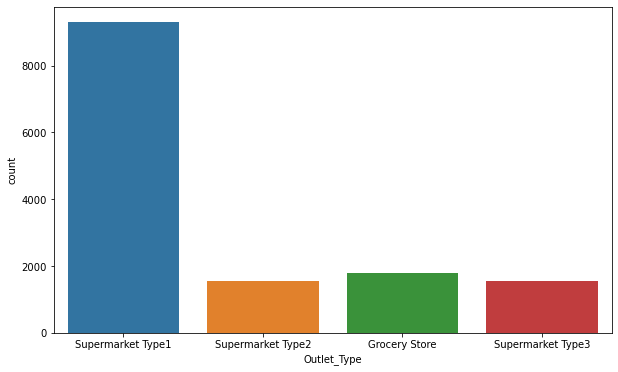

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=bigmart)

# Bivariate Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

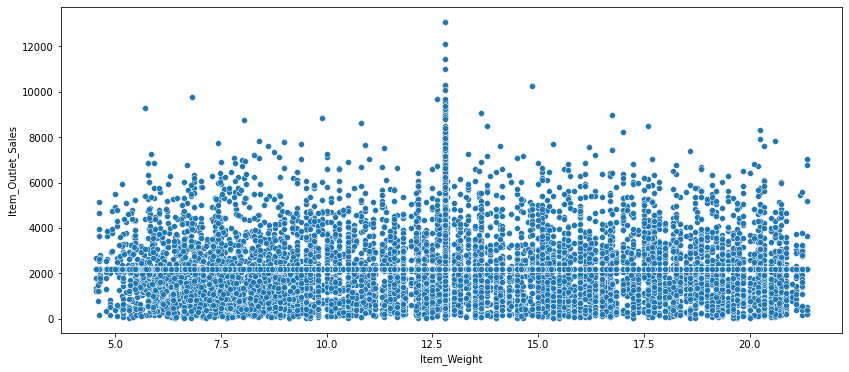

In [28]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

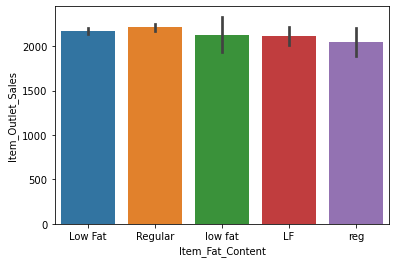

In [29]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

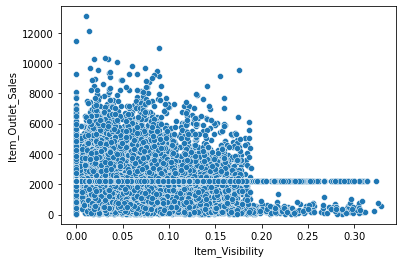

In [30]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

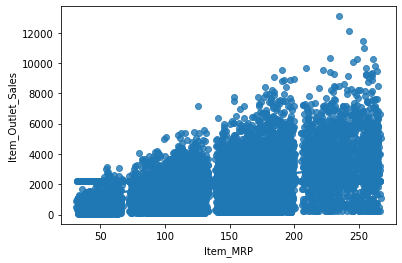

In [31]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

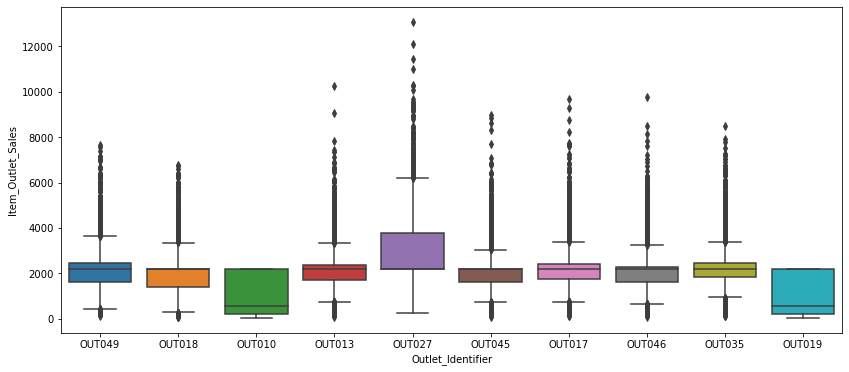

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

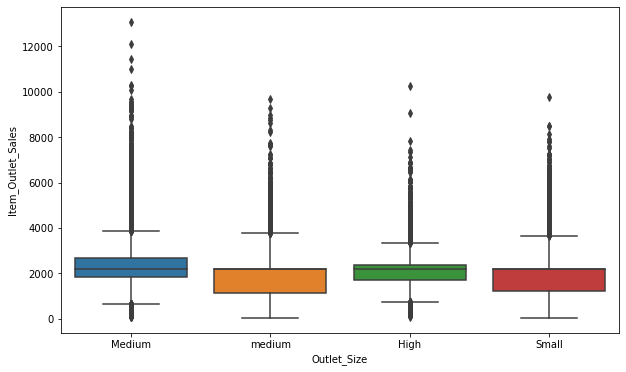

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=bigmart)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

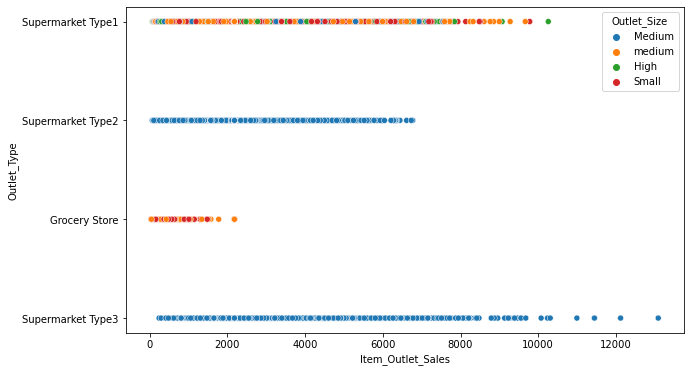

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Outlet_Type',x='Item_Outlet_Sales',hue='Outlet_Size',data=bigmart)

<AxesSubplot:>

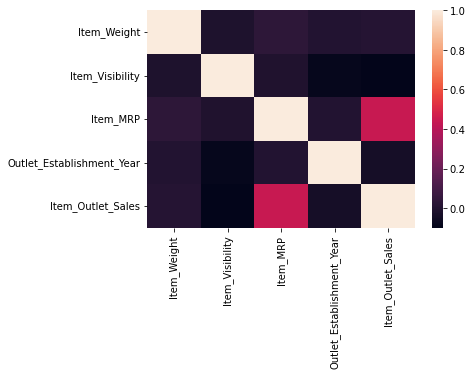

In [35]:
sns.heatmap(bigmart.corr())

Plots Showing the relationship between all factors

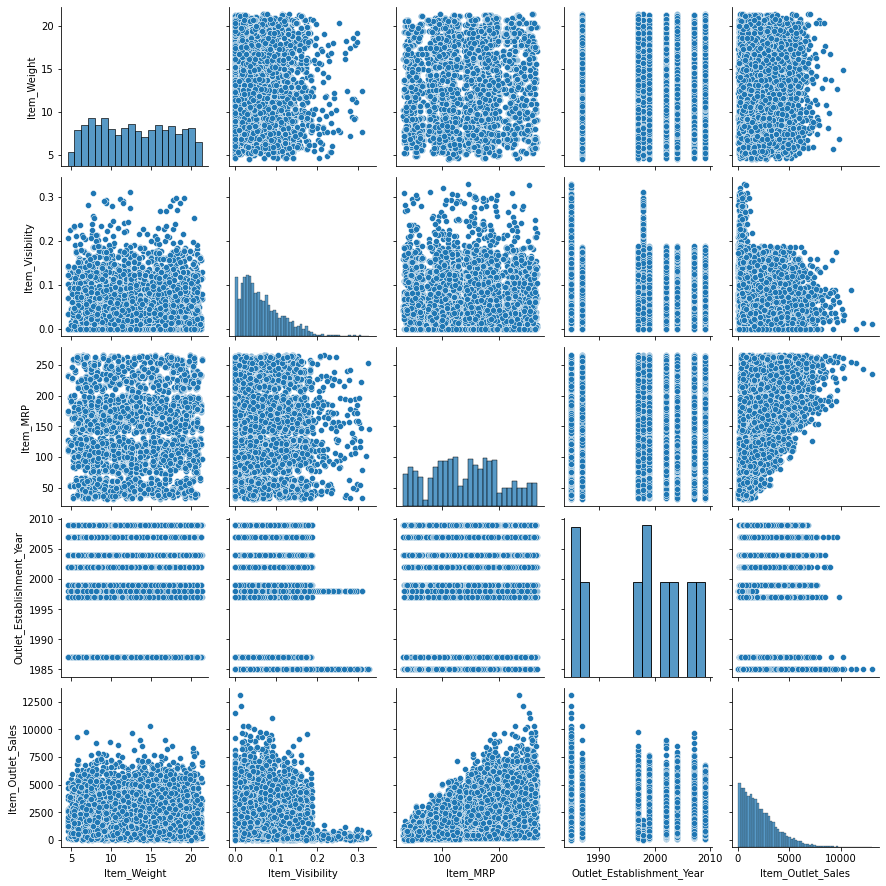

In [36]:
sns.pairplot(train)

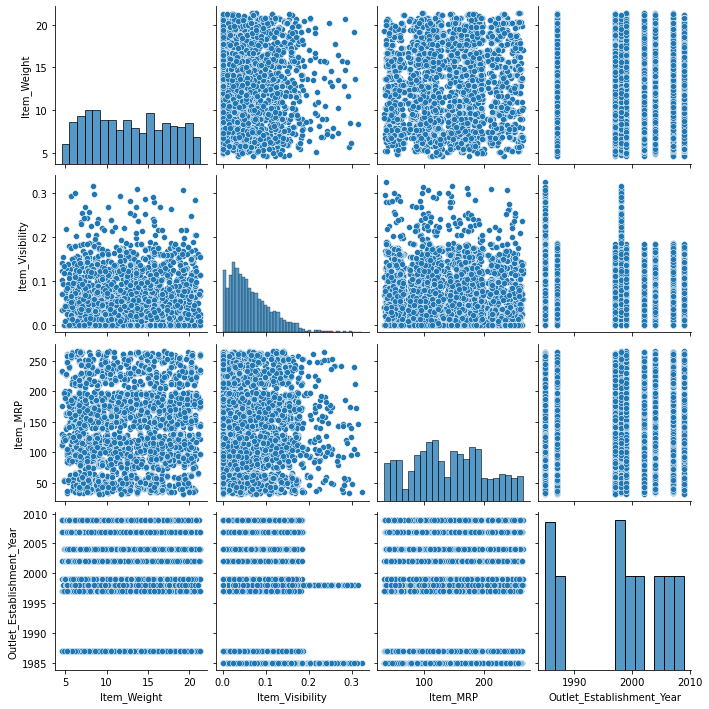

In [37]:
sns.pairplot(test)

## Missing value treatment

In [38]:
missing_values_count = bigmart.isnull().sum()
missing_values_count[0:]

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering 

# Encoding categorial Variables

In [39]:
bigmart['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
def fun(x):
    if x=='Low Fat' or x=='LF' or x=='low fat':
        return(0)
    else:
        return(1)

In [41]:
bigmart['Item_Fat_Content']=bigmart['Item_Fat_Content'].apply(fun)

In [42]:
bigmart['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [43]:
print('Original Categories:')
print(bigmart['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
bigmart['Item_Fat_Content'] = bigmart['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(bigmart['Item_Fat_Content'].value_counts())

Original Categories:
0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

Modified Categories:
0    9185
1    5019
Name: Item_Fat_Content, dtype: int64


In [44]:
bigmart['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [45]:
bigmart['Outlet_Size'].unique()

array(['Medium', 'medium', 'High', 'Small'], dtype=object)

In [46]:
def fun1(x):
  if x=='Medium':
    return(0)
  elif x=='High':
    return(1)
  else:
    return(2)

In [47]:
bigmart['Outlet_Size']=bigmart['Outlet_Size'].apply(fun1)

In [48]:
bigmart['Outlet_Size'].head()

0    0
1    0
2    0
3    2
4    1
Name: Outlet_Size, dtype: int64

In [49]:
bigmart['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [50]:
def fun2(x):
  if x=='Tier 1':
    return(0)
  elif x=='Tier 2':
    return(1)
  else:
    return(2)

In [51]:
bigmart['Outlet_Location_Type']=bigmart['Outlet_Location_Type'].apply(fun2)

In [52]:
bigmart['Outlet_Location_Type'].head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int64

In [53]:
bigmart['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [54]:
def fun3(x):
  if x=='Supermarket Type1':
    return(0)
  elif x=='Supermarket Type2':
    return(1)
  elif x=='Supermarket Type3':
    return(2)
  else:
    return(3)

In [55]:
bigmart['Outlet_Type']=bigmart['Outlet_Type'].apply(fun3)

In [56]:
bigmart['Outlet_Type'].head()

0    0
1    1
2    0
3    3
4    0
Name: Outlet_Type, dtype: int64

In [57]:
bigmart['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [58]:
bigmart1=pd.get_dummies(bigmart['Outlet_Identifier'])

In [59]:
bigmart=pd.concat([bigmart,bigmart1],axis=1)

In [60]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'OUT010', 'OUT013', 'OUT017',
       'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049'],
      dtype='object')

In [61]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,...,0,1,0,0,0,0,0,0,0,0


# Label Encoding

In [62]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
 12  OUT010                     14204 non-null  uint8  
 13  OUT013                     14204 non-null  uint

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
labelencoder=LabelEncoder()
bigmart["ID"]= labelencoder.fit_transform(bigmart["Item_Identifier"])
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,ID
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,1,156
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,...,0,0,1,0,0,0,0,0,0,8
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,1,662
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,...,0,0,0,0,0,0,0,0,0,1121
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,...,1,0,0,0,0,0,0,0,0,1297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,...,0,0,0,0,0,0,0,1,0,233
5677,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,OUT018,2009,0,2,...,0,0,1,0,0,0,0,0,0,308
5678,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,1,...,0,0,0,0,0,0,1,0,0,1426
5679,FDJ26,15.30,1,0.000000,Canned,214.6218,OUT017,2007,2,1,...,0,1,0,0,0,0,0,0,0,521


# One Hot  Encoding

In [65]:
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,ID
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,1,156
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,...,0,0,1,0,0,0,0,0,0,8
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,1,662
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,...,0,0,0,0,0,0,0,0,0,1121
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,...,1,0,0,0,0,0,0,0,0,1297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,...,0,0,0,0,0,0,0,1,0,233
5677,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,OUT018,2009,0,2,...,0,0,1,0,0,0,0,0,0,308
5678,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,1,...,0,0,0,0,0,0,1,0,0,1426
5679,FDJ26,15.30,1,0.000000,Canned,214.6218,OUT017,2007,2,1,...,0,1,0,0,0,0,0,0,0,521


In [66]:
bmart_ohe_bigmart=pd.get_dummies(bigmart['ID'],prefix='ID',drop_first=True)
bmart_ohe_bigmart

,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,...,ID_1549,ID_1550,ID_1551,ID_1552,ID_1553,ID_1554,ID_1555,ID_1556,ID_1557,ID_1558
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
bigmart=pd.concat([bigmart,bmart_ohe_bigmart],axis=1)
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,ID_1549,ID_1550,ID_1551,ID_1552,ID_1553,ID_1554,ID_1555,ID_1556,ID_1557,ID_1558
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,0,2,...,0,0,0,0,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,...,0,0,0,0,0,0,0,0,0,0
5677,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,OUT018,2009,0,2,...,0,0,0,0,0,0,0,0,0,0
5678,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,1,...,0,0,0,0,0,0,0,0,0,0
5679,FDJ26,15.30,1,0.000000,Canned,214.6218,OUT017,2007,2,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
bigmart.dtypes.head(20)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
OUT010                         uint8
OUT013                         uint8
OUT017                         uint8
OUT018                         uint8
OUT019                         uint8
OUT027                         uint8
OUT035                         uint8
OUT045                         uint8
dtype: object

## Preprocessing Data

In [69]:
x=bigmart.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=bigmart['Item_Outlet_Sales']

In [70]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,OUT010,OUT013,...,ID_1549,ID_1550,ID_1551,ID_1552,ID_1553,ID_1554,ID_1555,ID_1556,ID_1557,ID_1558
0,9.30,0,0.016047,249.8092,OUT049,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,OUT018,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,OUT049,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.20,1,0.000000,182.0950,OUT010,2,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,OUT013,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

In [74]:
print(x_train)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
8129    10.895000                 0         0.035741  131.9284   
5012     9.500000                 1         0.035350  169.7448   
4897    15.100000                 0         0.095079  159.6604   
2458    13.000000                 1         0.083644  196.0426   
6279    12.792854                 1         0.102422  131.4968   
...           ...               ...              ...       ...   
905     17.850000                 0         0.065810  149.1050   
5192     9.600000                 0         0.049618   44.2086   
3649     9.000000                 0         0.065249  177.0370   
235     12.792854                 0         0.043574  192.8846   
4826     9.395000                 0         0.040043   84.9908   

     Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
8129            OUT035            2                     1            0   
5012            OUT017            2                     1  

In [75]:
print(y_train)

8129     659.142000
5012    3579.340800
4897    2181.288914
2458    2570.653800
6279    1565.961600
           ...     
905     2247.075000
5192      44.608600
3649    2181.288914
235     2293.015200
4826    2181.288914
Name: Item_Outlet_Sales, Length: 11363, dtype: float64


In [76]:
print(x_test)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
1013       16.000                 1         0.065064   76.2986   
6087       19.000                 0         0.128350  106.5622   
4360       18.250                 0         0.077710  259.6962   
7782       13.100                 1         0.044192  180.3318   
5157       11.000                 1         0.222858  218.9798   
...           ...               ...              ...       ...   
395        16.250                 1         0.048976  151.0682   
3358       10.800                 0         0.041931  188.0214   
535        12.850                 0         0.033408  195.0768   
7920        6.710                 0         0.000000  218.9166   
1713        6.195                 1         0.109354  120.4098   

     Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
1013            OUT046            2                     0            0   
6087            OUT045            2                     1  

In [77]:
print(y_test)

1013    2181.288914
6087    1482.070800
4360    5438.920200
7782    2345.613400
5157    2181.288914
           ...     
395     2181.288914
3358    2181.288914
535     2181.288914
7920    2394.882600
1713    2181.288914
Name: Item_Outlet_Sales, Length: 2841, dtype: float64


In [78]:
bigmart.dtypes.head(12)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [79]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Modeling

## Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lrm=LinearRegression()

In [82]:
lrm.fit(x_train,y_train)

ValueError: could not convert string to float: 'OUT035'

In [83]:
predicted=lrm.predict(x_test)

ValueError: could not convert string to float: 'OUT046'

## Regularized Linear Regression

In [84]:
print("SCORE",lrm.score(x_test,y_test))

ValueError: could not convert string to float: 'OUT046'

In [85]:
print("mean absolute error",mean_absolute_error(y_test,predicted))

NameError: name 'predicted' is not defined

## Random Forest 

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfg=RandomForestRegressor()

In [88]:
rfg.fit(x_train,y_train)

ValueError: could not convert string to float: 'OUT035'

In [89]:
predicted=rfg.predict(x_test)

ValueError: could not convert string to float: 'OUT046'

## XGBoost

In [90]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
mart = loadtxt('Train.csv', delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


ValueError: could not convert string to float: 'Item_Identifier'

## Summary 